# 1) Data Exploration

## Load the Dataset

In [ ]:
# 1. Name: Victor Ha PSID: 2018028
# 2. Name: Carl Aguinaldo PSID: 2238572
# 3. Name: Dylan Berens PSID: 1899838 dylan.berens700@gmail.com
# 4. Name: Ashmal Macknojia PSID#: 2171115

import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("prathamtripathi/regression-with-neural-networking")

# Path of the csv of dataset
file_path = path + "/concrete_data.csv"

# Read csv into pandas dataframe
data = pd.read_csv(file_path)

ModuleNotFoundError: No module named 'kagglehub'

### Question 1: Print out the first 5 rows of the dataset.

In [7]:
print(data.head())

   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30  


### Question 2: Print the statistic summary of the dataset (mean, standard deviation, min, max, distribution)


In [9]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Question 3: Are there any missing values?

In [21]:
print(data.isnull().sum())
#There are no null values
print(data['Blast Furnace Slag'])
# However, Blast Furnace, Fly Ash, and Superplasticizer all have 0 values which may affect the model later on if we
# don't address them (change to mean/median or drop rows)

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64
0         0.0
1         0.0
2       142.5
3       142.5
4       132.4
        ...  
1025    116.0
1026      0.0
1027    139.4
1028    186.7
1029    100.5
Name: Blast Furnace Slag, Length: 1030, dtype: float64


**EXPLAIN HERE**

There are no null values so technically there are no missing values, however some features have values of 0 which may be incorrect.

# 2) Correlation and Relationship

### Question 4: Create the correlation matrix and plot it. Find the top 3 key predictors for Strength. Identify the potential issue from this matrix

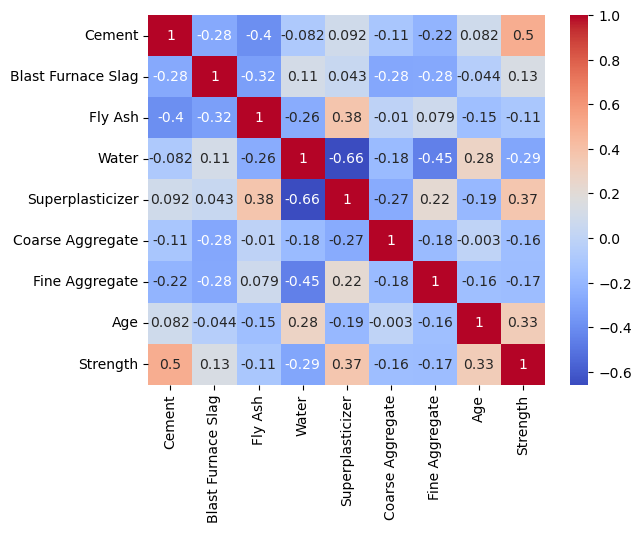

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


**ANSWER HERE**

The top 3 predictors for strength are cement, age, and superplasticizer with correlation of 0.5, 0.33, and 0.37. respectively.

A potential issue with the matrix is that for the predictors of strength, there are no strong (>0.5) correlations.

### Question 5: Plot the scatterplot between strength and its strongest correlation.

The plot should be between cement and strength

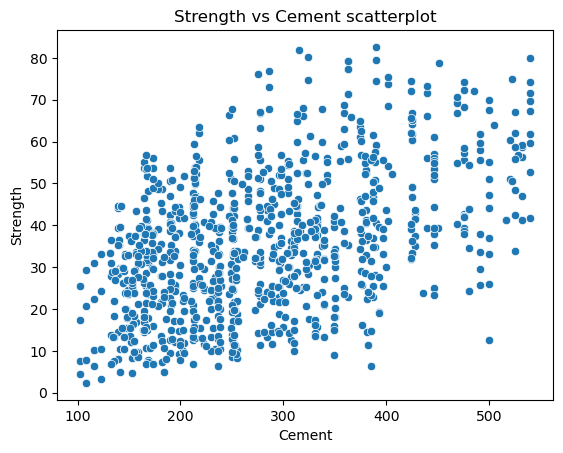

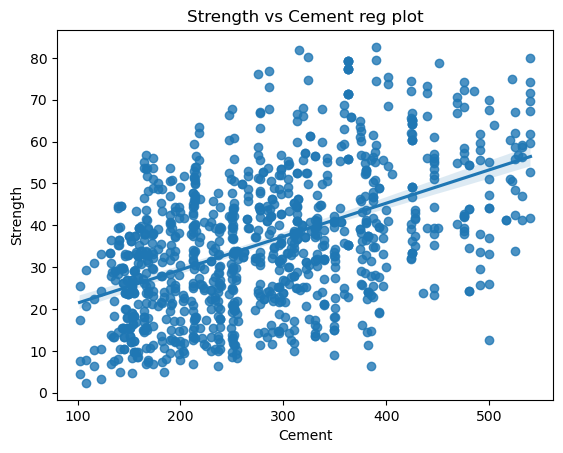

In [42]:
sns.scatterplot(x=data['Cement'], y=data['Strength'], data=data)
plt.xlabel('Cement')
plt.ylabel('Strength')
plt.title('Strength vs Cement scatterplot')
plt.show()

sns.regplot(x=data['Cement'], y=data['Strength'], data=data)
plt.xlabel('Cement')
plt.ylabel('Strength')
plt.title('Strength vs Cement reg plot')
plt.show()

### Question 6: Describe the relationship between the variables based on the scores and plot

**EXPLAIN HERE**

It seems there is positive linear relationship between cement and strength, with a large spread

# 3) Linear Regression

### Question 7: Create Linear Regression Model

1.   Define the features and define the target variable
2.   Do a 80/20 split for training and test set
3.   Build and train a linear regression model
4.   Print the model parameters


1.   Define the features and target variables

In [47]:
#Features : Cement, Blast Furnace Slag, Fly Ash, Water, Superplasticizer, Coarse Aggregate, Fine Aggregate, Age
#Target: Strength

2. Do a 80/20 split for training and test set with a random state of 42

In [116]:
from sklearn.model_selection import train_test_split

X = data[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']]

data_2 = data

#data_2[['Blast Furnace Slag'] == 0] = 1
#data_2[['Fly Ash'] == 0] = data_2['Fly Ash'].mean()
#data_2[['Superplasticizer'] == 0] = data_2['Superplasticizer'].mean()

print(data_2[['Blast Furnace Slag', 'Fly Ash', 'Superplasticizer']].describe())

data_2[data_2['Blast Furnace Slag']==0.0] = data_2['Blast Furnace Slag'].mean()
data_2[data_2['Fly Ash']==0.0] = data_2['Fly Ash'].mean()
data_2[data_2['Superplasticizer']==0.0] = data_2['Superplasticizer'].mean()

print(data_2[['Blast Furnace Slag', 'Fly Ash', 'Superplasticizer']].describe())

X_adjusted = data_2[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']]

y = data['Strength']
y2 = data_2['Strength']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_adjusted,y2,test_size=0.2, random_state = 42)


       Blast Furnace Slag      Fly Ash  Superplasticizer
count         1030.000000  1030.000000       1030.000000
mean            71.923740    78.608691         54.966750
std             28.983752    27.873215         25.268919
min             11.000000    24.500000          1.700000
25%             59.359936    59.359936         59.359936
50%             73.895825    73.895825         59.359936
75%             73.895825    73.895825         73.895825
max            214.000000   195.000000         73.895825
       Blast Furnace Slag      Fly Ash  Superplasticizer
count         1030.000000  1030.000000       1030.000000
mean            71.923740    78.608691         54.966750
std             28.983752    27.873215         25.268919
min             11.000000    24.500000          1.700000
25%             59.359936    59.359936         59.359936
50%             73.895825    73.895825         59.359936
75%             73.895825    73.895825         73.895825
max            214.000000   195

3. Build and train a linear regression model

In [120]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test2)

4. Print the model parameters (Slope & Intercept)

In [69]:
print(f"Coefficients: {model.coef_}")

print(f"Intercept: {model.intercept_}")

Coefficients: [ 0.11899393  0.1085356   0.08215181 -0.13527626  0.31056994  0.01786715
  0.02409978  0.11643864]
Intercept: -28.82355499969296


# 4) Model Evaluation and Visualization



### Question 8: Perform prediction and interpret the model performance (RMSE, R-Squared)

In [122]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f"r^2 score: {r2}")
print(f"mse: {mse}")
print(f"rmse: {rmse}")


r22 = r2_score(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2,y_pred2)
rmse2 = np.sqrt(mse)

print(f"r^2 score: {r22}")
print(f"mse: {mse2}")
print(f"rmse: {rmse2}")

r^2 score: 0.9318065869738796
mse: 14.435101170881278
rmse: 3.7993553625426086
r^2 score: 0.9318065869738796
mse: 14.435101170881278
rmse: 3.7993553625426086


### Interpretation
**EXPLAIN HERE**

We have a pretty low r^2 score, so lets try adjusting the 0 values and create a new model where we replace the 0 values with the mean of the column

Now we got an r^2 score of 0.93 which means 93% of the y-values can be explained by the features -> which is really good!

### Question 9: Plot the residual as a histogram and interpret the shape and spread of it.

31     -0.057536
109    -0.057536
136    -0.057536
88     -0.057536
918     0.052637
         ...    
482    -5.386523
545     0.052637
110    -0.057536
514    13.303998
602     0.052637
Name: Strength, Length: 206, dtype: float64


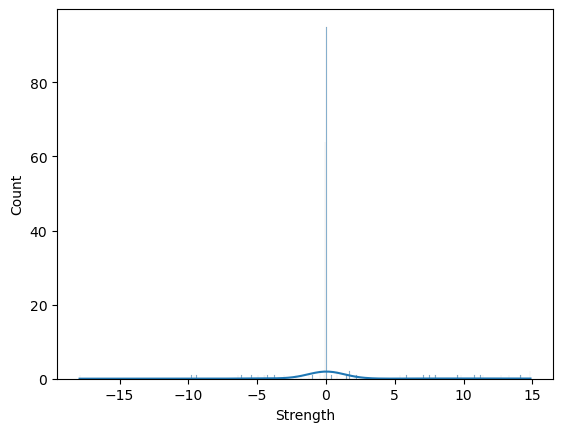

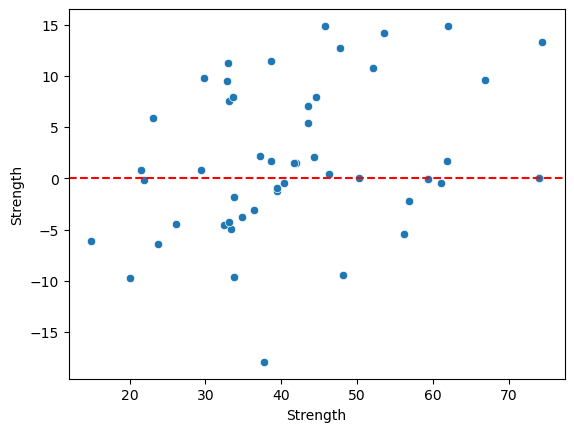

In [132]:
import seaborn as sns

resid = y_test - y_pred
print(resid)
sns.histplot(resid, kde=True)
plt.show()

sns.scatterplot(x=y_test, y=resid)
plt.axhline(0, color = "red", linestyle = "--")
plt.show()


### Interpretation:

**EXPLAIN HERE**

The hist plot actually looks pretty good, most of the residual values are 0 which is really good
The residual scatterplot is also looking really good because the values are all spread out